In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import chardet

In [2]:
'''
file_path = folder + 'Contact Time.txt'


# Detect file encoding
with open(file_path, 'rb') as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)
    encoding = result['encoding']
    print(f"Detected encoding: {encoding}")

'''

'\nfile_path = folder + \'Contact Time.txt\'\n\n\n# Detect file encoding\nwith open(file_path, \'rb\') as file:\n    raw_data = file.read()\n    result = chardet.detect(raw_data)\n    encoding = result[\'encoding\']\n    print(f"Detected encoding: {encoding}")\n\n'

In [3]:
colors = ['r', 'blueviolet', 'cyan', 'orange', 'lime']
label = ["Chile", "La Palma", "Hawaii", "SALT", "DAG"]

def plotting(folder, filepath, title, ylabel, cols, saving_name, xlim):
    df = pd.read_csv(folder + filepath, delimiter='\t', skiprows = 2, encoding = "utf-16", header = None)
    df = np.asarray(df)
    dat = 1.*(df.T)
    df = df.T
    dat[dat == 0] = np.nan
    
    shape = dat.shape
    N = int(shape[1]/2)
    plt.figure(figsize = (8, 5))

    for i in cols:
        plt.plot(dat[2*i], dat[2*i+1], label = label[i], linewidth = 1.0, color = colors[i])
    plt.title(title)
    plt.xlabel("time [d]")
    plt.ylabel(ylabel)
    plt.legend()
    plt.xlim(*xlim)
    #plt.xlim(0,5)
    plt.savefig(saving_name)

    if(title == "Distance"):
        
        v_r = np.ones_like(df[:,:-1])
        a_r = np.ones_like(df[:,:-2])
        for i in cols:
            r = 1.*df[2*i+1]
            v_r[2*i+1] = (r[1:] - r[:-1])/(df[0,1] - df[0,0])/24./3600 #np.gradient(df[2*i+1], (df[0,1] - df[0,0])*24.*3600)
            
            a_r[2*i+1] = (v_r[2*i+1,1:] - v_r[2*i+1,:-1])/(df[0,1] - df[0,0])/24./3600
        v_r[(df[:,:-1]==0) | (df[:,1:]==0)] = 0
        a_r[(v_r[:,:-1]==0) | (v_r[:,1:]==0)] = 0
        v_r[v_r ==0] = np.nan
        a_r[a_r==0] = np.nan
            
            


        plt.figure(figsize = (8, 5))
        for i in cols:
            plt.plot(df[2*i, 1:], v_r[2*i+1], label = label[i], linewidth = 1.0, color = colors[i])
        plt.title("Line-of-Sight Velocity")
        plt.xlabel("time [d]")
        plt.ylabel("km/s")
        plt.legend()
        plt.xlim(*xlim)
        #plt.xlim(0,5)
        plt.savefig(folder + "Velocity.png")

        C = 299792.458
        plt.figure(figsize = (8, 5))
        for i in cols:
            plt.plot(df[2*i, 1:], v_r[2*i+1]/C, label = label[i], linewidth = 1.0, color = colors[i])
        plt.title("Doppler Shift")
        plt.xlabel("time [d]")
        plt.ylabel(r"$\Delta \lambda / \lambda$")
        plt.legend()
        plt.xlim(*xlim)
        #plt.xlim(0,5)
        plt.savefig(folder + "DopplerShift.png")


    
        plt.figure(figsize = (8, 5))
        for i in cols:
            plt.plot(df[2*i, 1:-1], 100000*a_r[2*i+1], "-", label = label[i], linewidth = 1.0, color = colors[i])
        plt.title("Line-of-Sight Acceleration")
        plt.xlabel("time [d]")
        plt.ylabel("cm/s^2")
        plt.legend()
        plt.xlim(*xlim)
        #plt.xlim(0,5)
        plt.savefig(folder + "Acceleration.png")
        print((df[2*i, :]-df[2*i, 0])*24*3600)



[0.00000e+00 1.44000e+03 2.88000e+03 ... 2.58768e+06 2.58912e+06
 2.59056e+06]
[0.00000e+00 1.44000e+03 2.88000e+03 ... 2.58768e+06 2.58912e+06
 2.59056e+06]


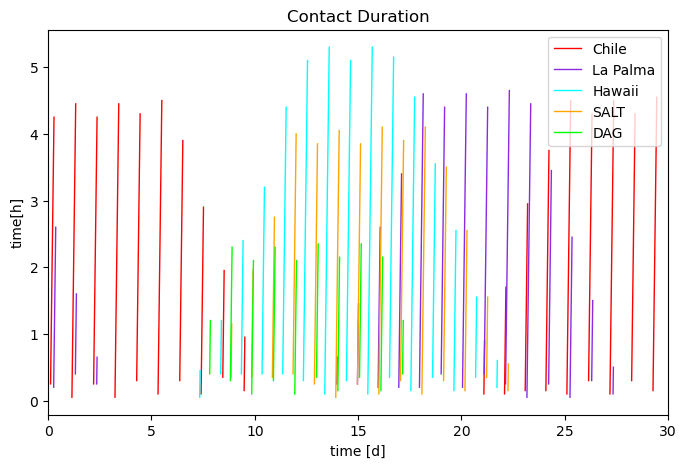

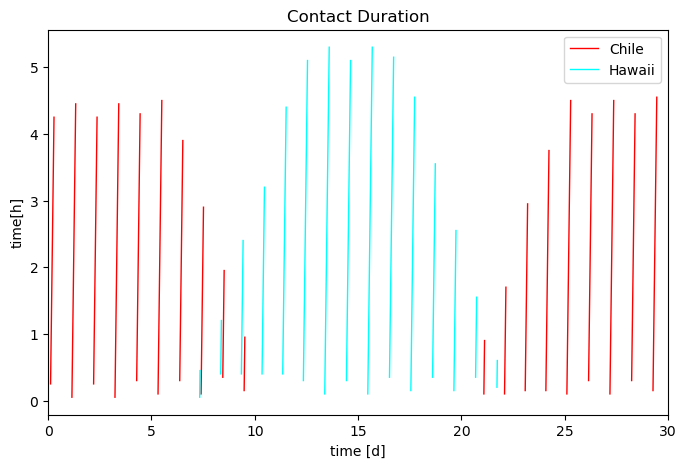

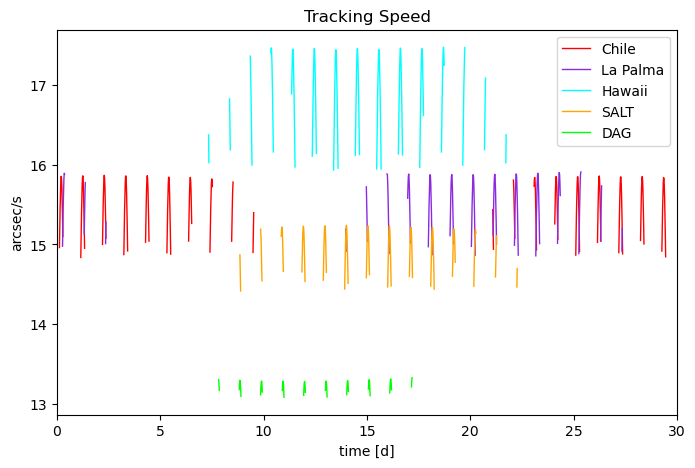

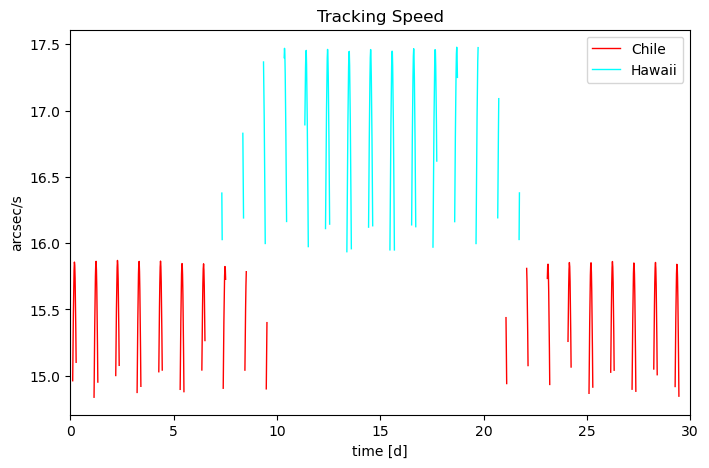

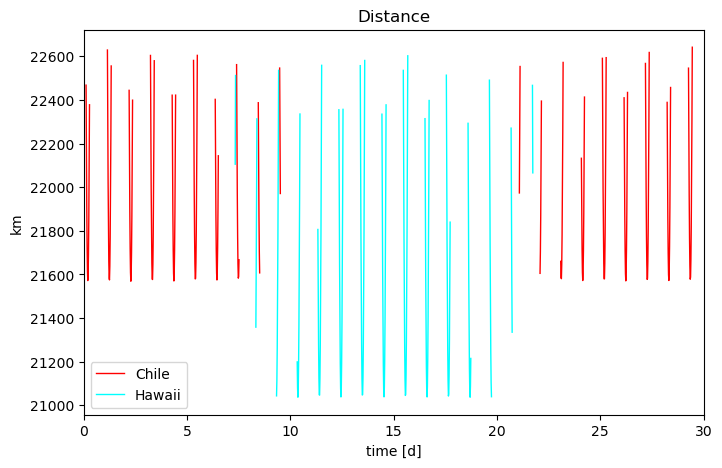

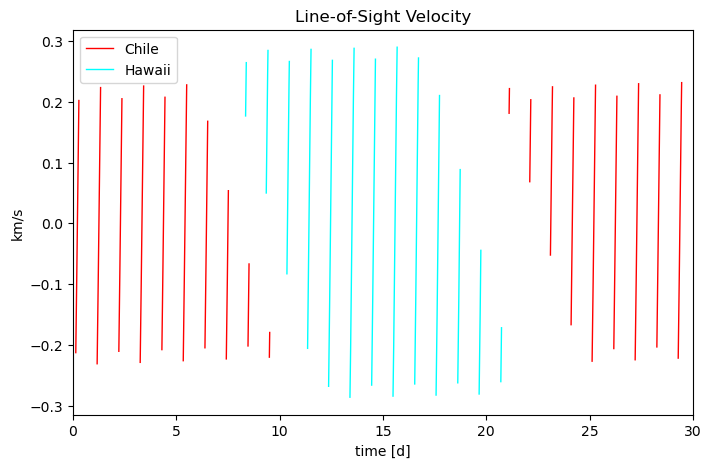

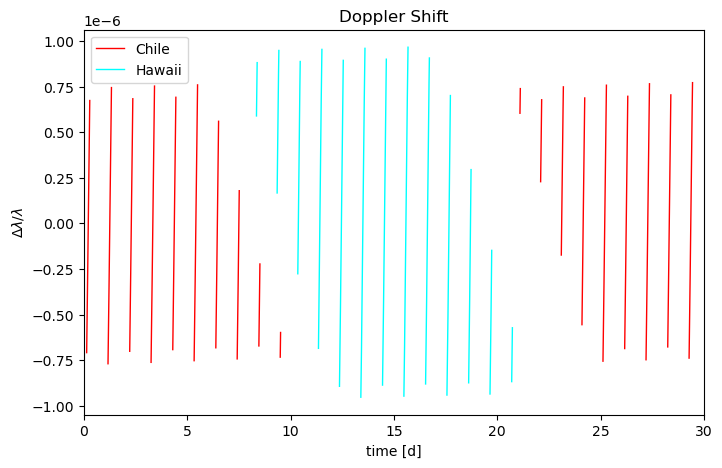

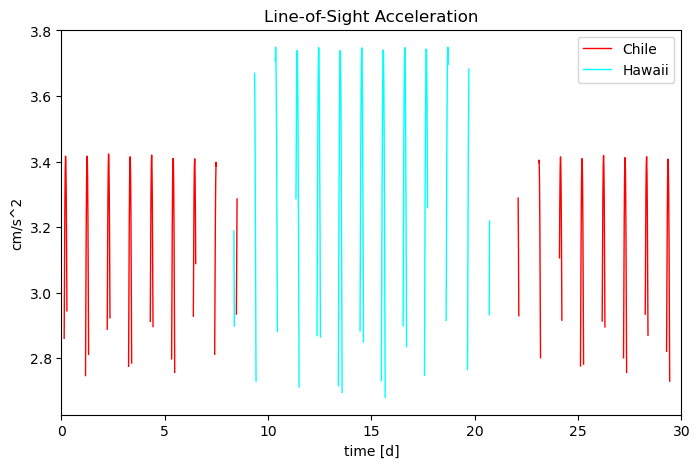

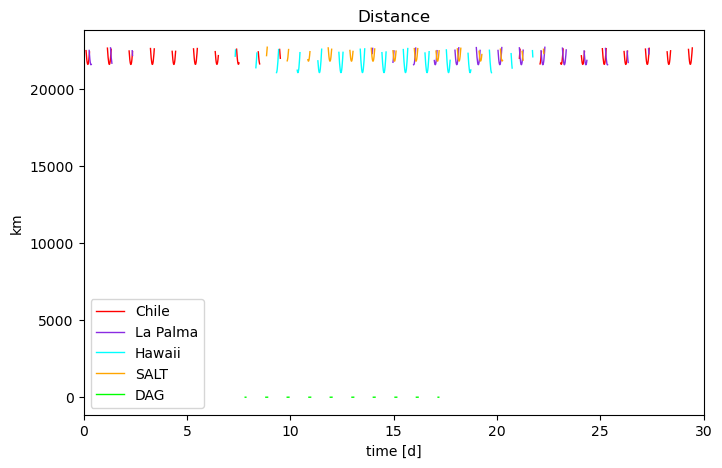

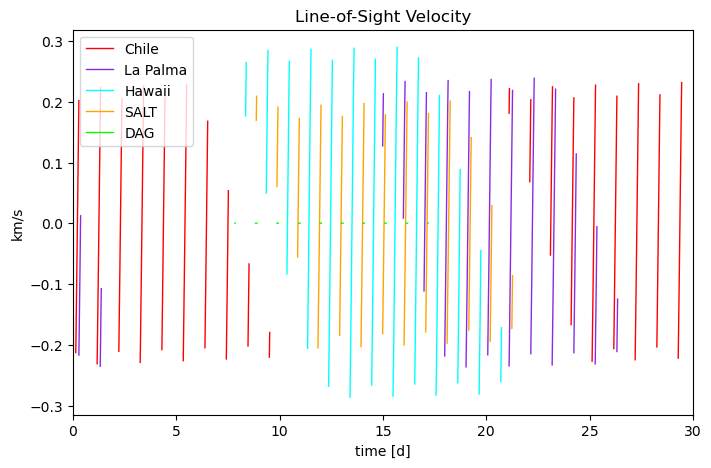

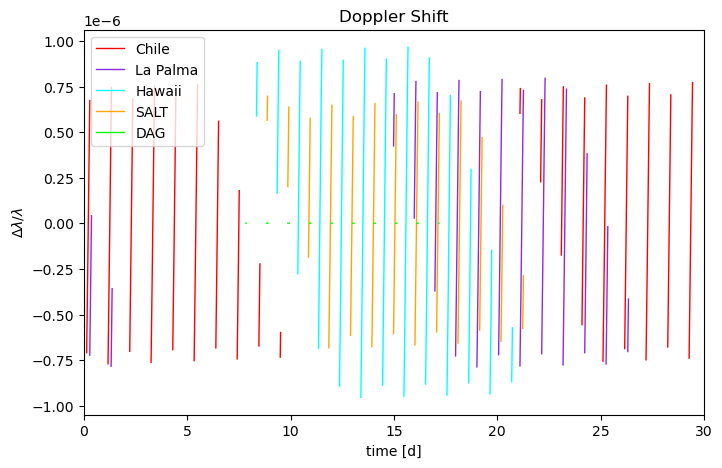

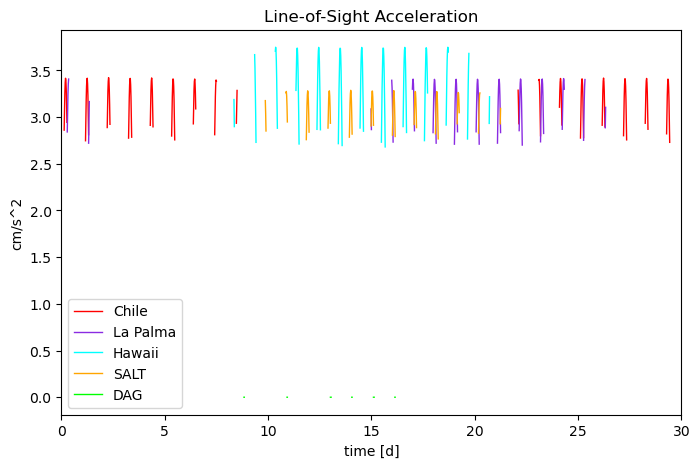

In [4]:
folder = "12.23h pro/air_sun/"
xlim = [0,30]
plotting(folder,"Contact Time.txt", "Contact Duration", "time[h]", [0,1,2,3,4], folder + "ContactTime.png", xlim)
plotting(folder,"Contact Time.txt", "Contact Duration", "time[h]", [0, 2], folder + "ContactTimeChile.png", xlim)

plotting(folder,"Tracking Speed.txt", "Tracking Speed", "arcsec/s", [0,1,2,3,4], folder + "TrackingSpeed.png", xlim)
plotting(folder,"Tracking Speed.txt", "Tracking Speed", "arcsec/s", [0, 2], folder + "TrackingSpeedChile.png", xlim)


plotting(folder,"Distances.txt", "Distance", "km", [0, 2], folder + "DistanceChile.png", xlim)
plotting(folder,"Distances.txt", "Distance", "km", [0,1,2,3,4], folder + "Distance.png", xlim)

